In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import style
style.use("ggplot")

In [66]:
# Combining all the months data
csv_files_list = list(map(lambda file: f"Sales_Data/{file}",os.listdir("Sales_Data")))
data_list = list(pd.read_csv(file) for file in csv_files_list)
sales = pd.concat(data_list, ignore_index=True)

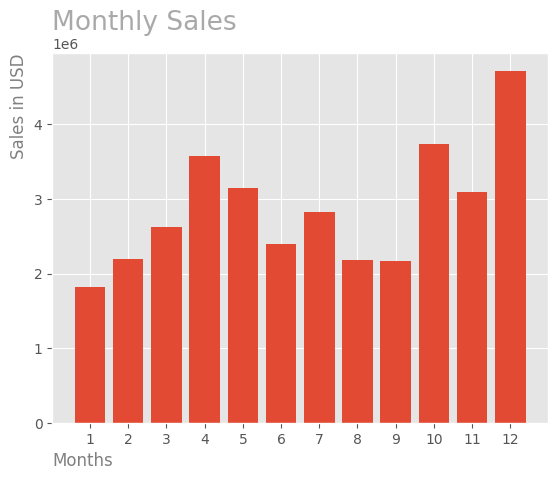

In [67]:
# What was the best month for sales and how much was earned that Month?
sales = sales.loc[sales['Order ID'] != "Order ID"]
sales.dropna(inplace=True)
sales.set_index(pd.to_datetime(sales['Order Date'],format="mixed",dayfirst=False),drop=True,inplace=True)
sales.drop("Order Date",axis=1,inplace=True)
best_month = sales['Quantity Ordered'].astype(float) * sales['Price Each'].astype(float)


# Creating a bar Graph to Answer
months = best_month.resample("BM").sum().sort_values(ascending=False).head(12).index.month # Ou range(1,13) kkkkkk
sales_values = pd.DataFrame(best_month.resample("BM").sum().sort_values(ascending=False).head(12))
plt.bar(months,sales_values[0])
plt.xticks(months)
plt.title("Monthly Sales",loc='left',color='darkgray',fontsize=19)
plt.xlabel("Months",loc="left",color='gray')
plt.ylabel("Sales in USD",loc='top',color='gray')
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'San Francisco'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'New York City'),
  Text(3, 0, 'Boston'),
  Text(4, 0, 'Atlanta'),
  Text(5, 0, 'Dallas'),
  Text(6, 0, 'Seattle'),
  Text(7, 0, 'Portland'),
  Text(8, 0, 'Austin')])

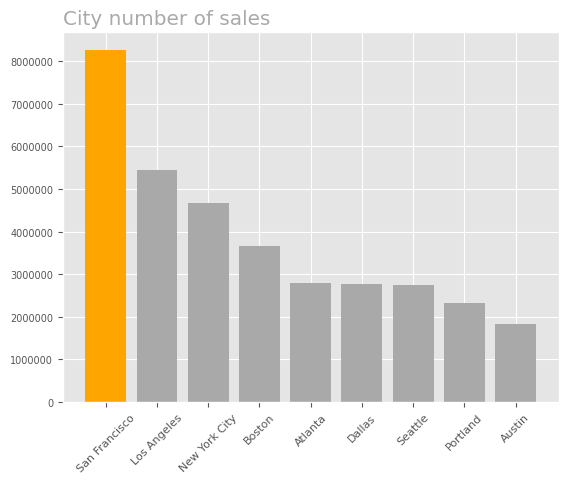

In [90]:
# Which city has the highest number of Sales?
sales['Total Profit'] = sales['Quantity Ordered'].astype(float) * sales['Price Each'].astype(float)
sales['City'] = sales['Purchase Address'].str.split(",",expand=True)[1].str.strip()

city_sales = sales.groupby("City")['Total Profit'].sum().sort_values(ascending=False)

plt.bar(city_sales.index,city_sales,color=list(map(lambda city: "orange" if city == "San Francisco" else "darkgray",city_sales.index)))
plt.title("City number of sales",loc='left',color='darkgray')
plt.ticklabel_format(style='plain',axis='y')
plt.yticks(fontsize=7)
plt.xticks(rotation=45,fontsize=8)